# imports

In [68]:
import numpy as np
import pandas as pd
import scanpy as sc
import palettable

# RNAseq analysis

In [69]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.16.2 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


In [89]:
filename = 'figures/Fig5/RNASeq_ReadCount.txt'
adata = sc.read_csv(filename,delimiter=' ').transpose()

In [90]:
label_list = [1,1,1,1,1,1,
             2,2,2,2,2,
             3,3,3,3]

In [91]:
adata.obs['label'] = np.array(label_list).astype('str')
adata.obs['label'] = adata.obs['label'].astype('category')

In [92]:
adata.obs['celltype'] = adata.obs['label'].copy() 

In [93]:
# Neighbor:1
# Distant:2
# Fibrosis:3
new_cluster_names = ['Neighbor','Distant','Fibrosis']
adata.rename_categories('celltype', new_cluster_names)

In [383]:
adata = adata[:,key_genes]

normalizing counts per cell
    finished (0:00:00)


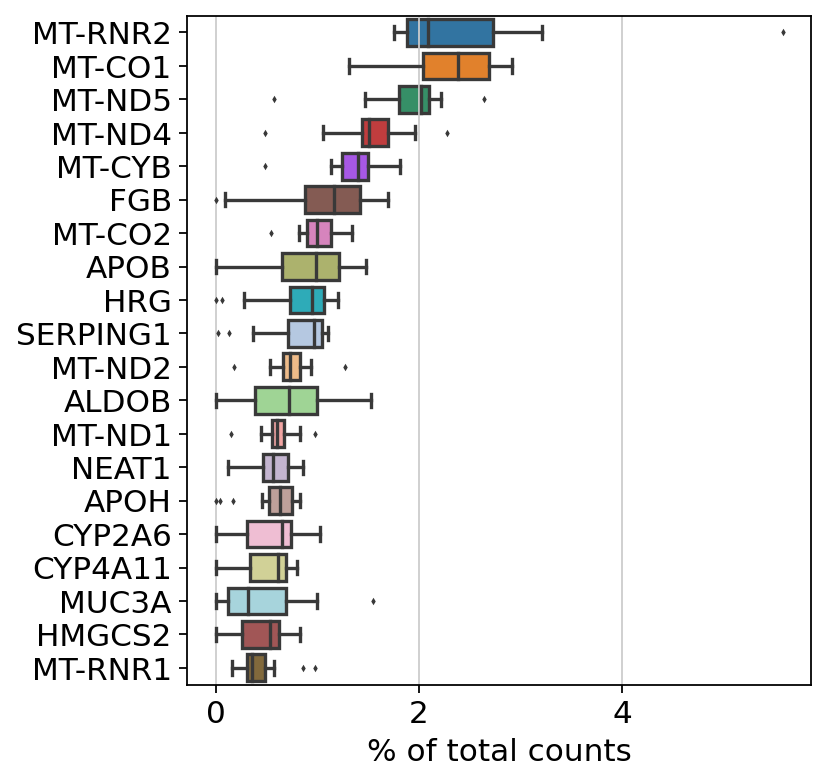

In [75]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [27]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)

In [25]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

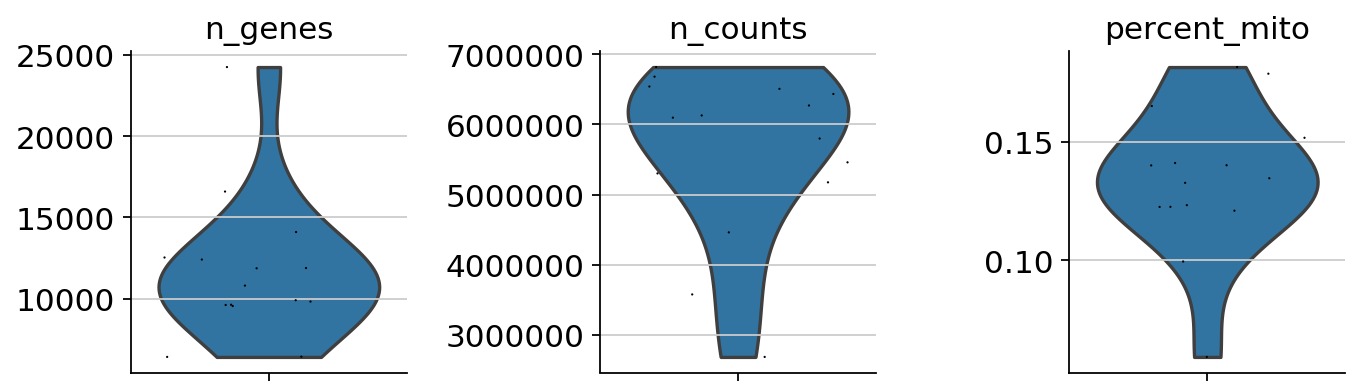

In [29]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

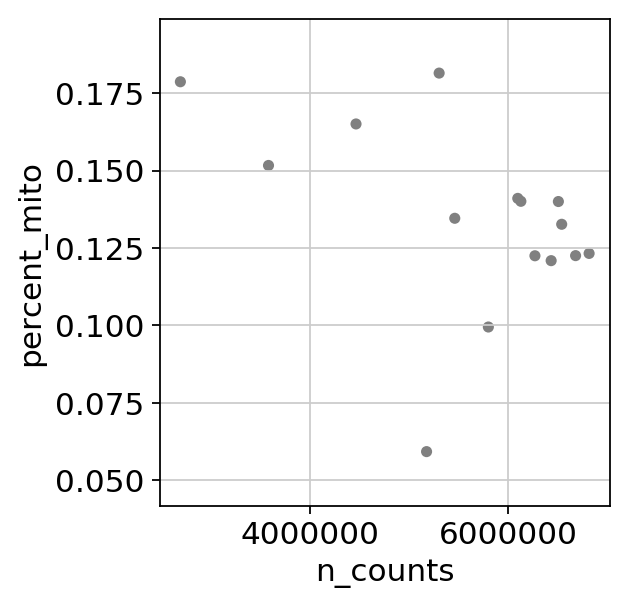

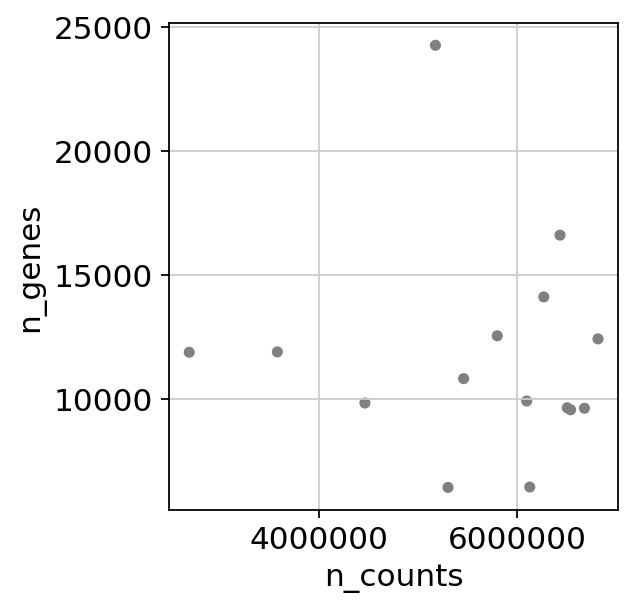

In [33]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito',size=100)
sc.pl.scatter(adata, x='n_counts', y='n_genes',size=100)

In [76]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:01)


In [88]:
adata.X

array([[-0.40631709,  1.2394435 , -0.51669836, ...,  0.01087374,
        -0.6461094 , -0.37874815],
       [ 0.8693069 , -0.5029375 , -0.51669836, ..., -0.82502496,
        -0.6461094 , -0.37874815],
       [-0.7749786 , -0.5029375 , -0.51669836, ...,  1.0131844 ,
         0.77726865,  0.00408396],
       ...,
       [-1.8697848 , -0.5029375 , -0.51669836, ...,  2.0634933 ,
         2.4987378 , -0.37874815],
       [ 0.18938701, -0.5029375 , -0.51669836, ..., -0.82502496,
        -0.6461094 , -0.37874815],
       [-1.3125684 ,  1.1516327 ,  1.6055458 , ...,  1.3614858 ,
         1.4006898 , -0.37874815]], dtype=float32)

In [94]:
sc.pp.normalize_total(adata)

normalizing counts per cell
    finished (0:00:00)


In [95]:
sc.pp.log1p(adata)

In [37]:
adata.raw = adata

In [38]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


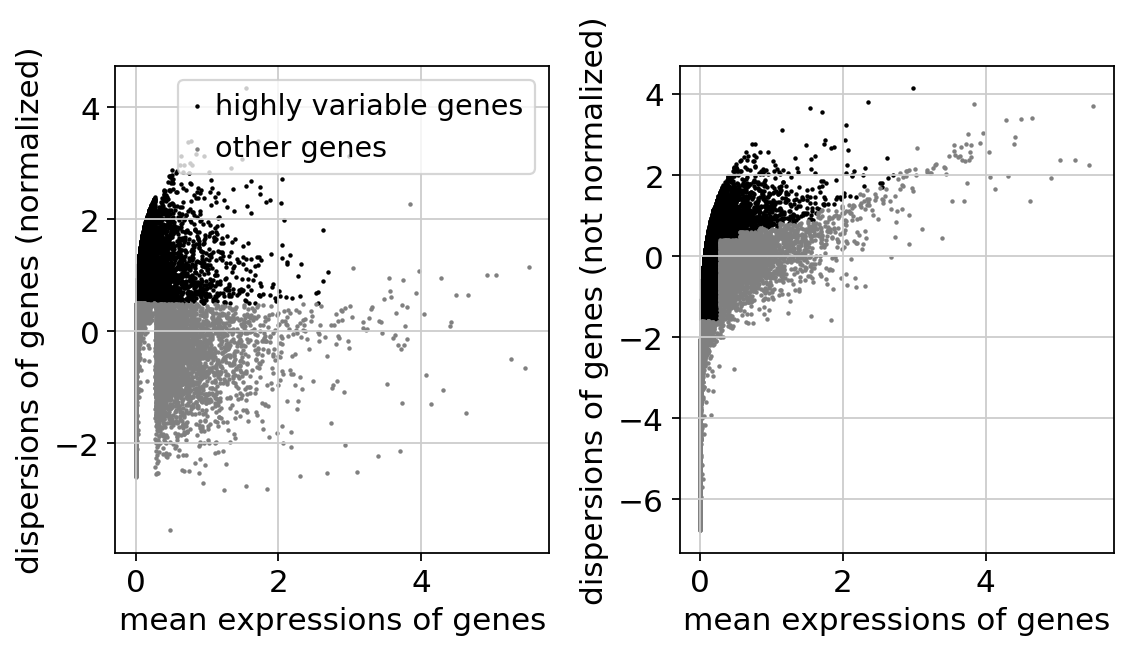

In [39]:
sc.pl.highly_variable_genes(adata)

In [41]:
adata = adata[:, adata.var.highly_variable]

In [43]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']


/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/anndata/_core/anndata.py:1118: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning,


    finished (0:00:19)


In [371]:
sc.pp.scale(adata)

/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [427]:
%matplotlib inline

In [96]:
sc.tl.pca(adata,n_comps=10)

computing PCA with n_comps = 10
    finished (0:00:00)


In [402]:
cls_cmp_ori = palettable.colorbrewer.qualitative.Set1_3.mpl_colors
cls_cmp = cls_cmp_ori.copy()
cls_cmp[0] = cls_cmp_ori[0]
cls_cmp[1] = cls_cmp_ori[2]
cls_cmp[2] = cls_cmp_ori[1]


In [410]:
cls_cmp=["#4DBBD5FF", "#00A087FF", "#E64B35FF"]

In [411]:
adata.uns['celltype_colors'] = cls_cmp

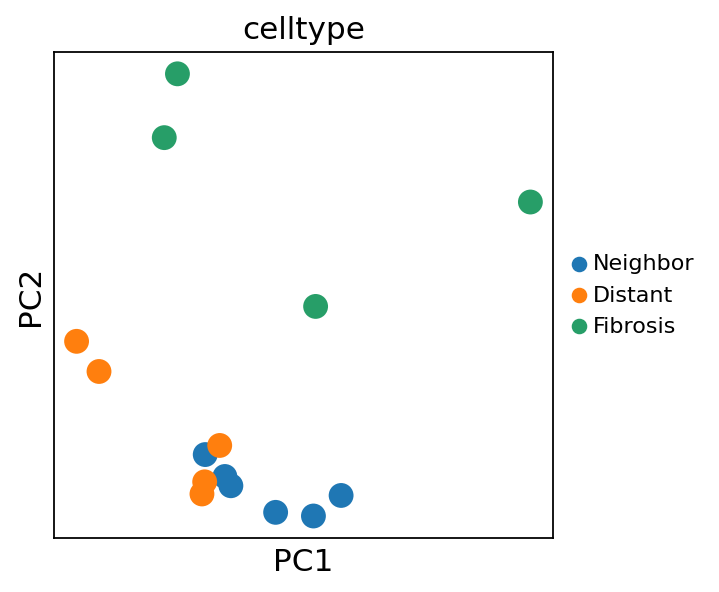

In [97]:

sc.pl.pca(adata, color=['celltype'],size=500,projection='2d',legend_fontsize=10)

In [86]:
1+1

2

In [317]:
sc.tl.paga(adata,groups='celltype')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


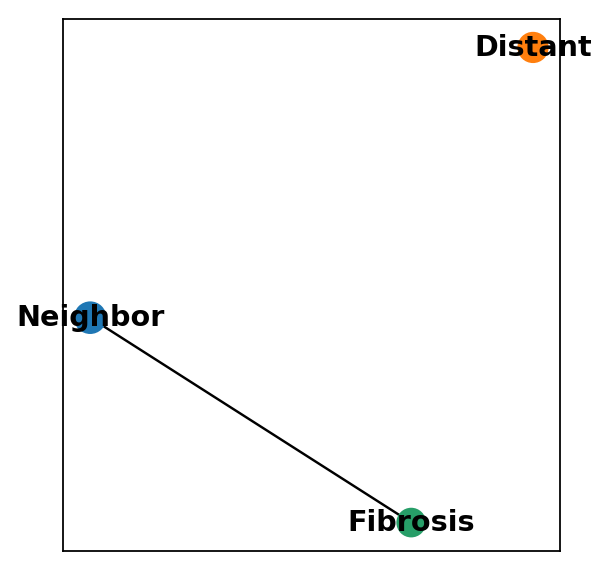

In [318]:
sc.pl.paga(adata)

In [144]:
label_f = [1,2,1,1,1,2,
          2,2,1,1,2,
          3,3,3,3]

In [153]:
adata.obs['region_type'] = np.array(label_f).astype('str')
adata.obs['region_type'] = adata.obs['region_type'].astype('category')

In [131]:
adata.obsm['X_pca']

array([[-18.821568 , -36.823242 ],
       [-24.62371  , -18.512957 ],
       [-10.8339615, -62.631504 ],
       [ -5.2932615, -66.52535  ],
       [-23.932579 , -24.00522  ],
       [-27.217632 ,  -8.66312  ],
       [-25.018002 , -19.151918 ],
       [-41.055687 ,   8.859335 ],
       [-28.467768 , -19.558292 ],
       [-28.509798 , -20.768599 ],
       [-42.481506 ,  12.967089 ],
       [-24.048086 ,  87.55416  ],
       [-20.232344 , 138.7845   ],
       [  2.6628926,  24.876596 ],
       [317.87323  ,   3.598428 ]], dtype=float32)

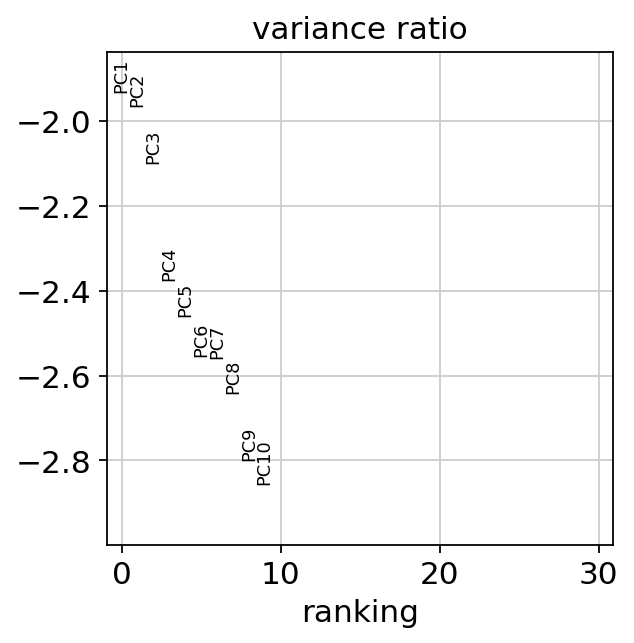

In [55]:
sc.pl.pca_variance_ratio(adata, log=True)

In [346]:
sc.pp.neighbors(adata, n_neighbors=3, n_pcs=2)

computing neighbors
    using 'X_pca' with n_pcs = 2
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)


In [347]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


In [350]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.          1.          1.          0.8824167   0.7016202  -0.17860506
     -0.29213575 -0.33918366 -0.4898438  -0.58335006 -0.63061786 -0.69097316
     -0.71851134 -0.72978127]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


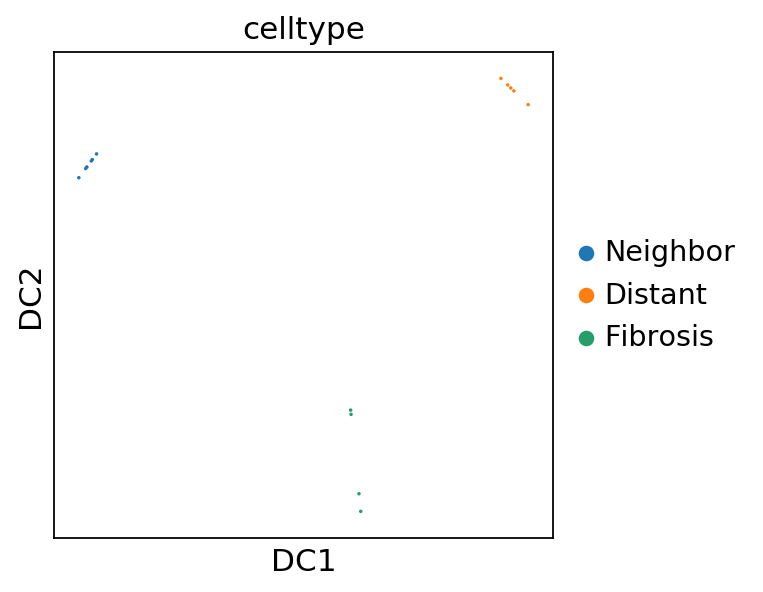

In [352]:
sc.pl.diffmap(adata,color=['celltype'],size=10)

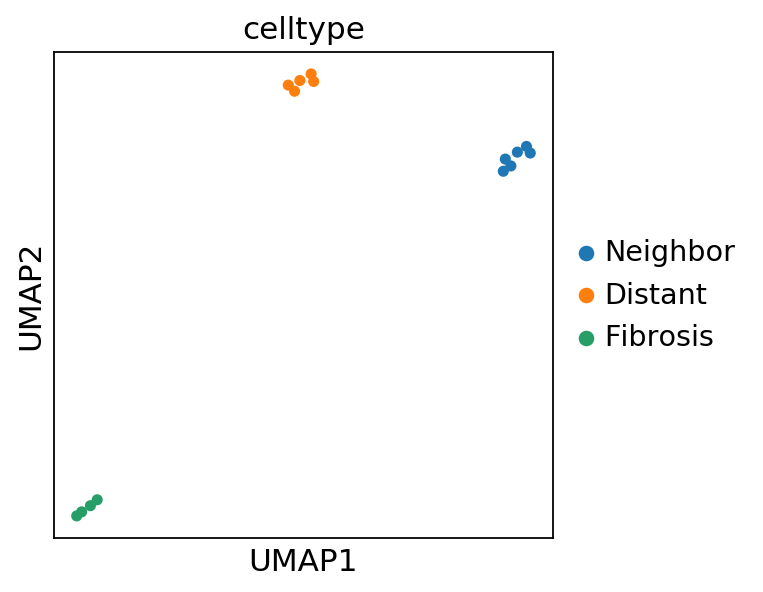

In [355]:
sc.pl.umap(adata,color=['celltype'],size=100,edges=True)

In [65]:
# adata.obs['celltype'] = adata.obs['label'].copy() 
adata.obs['celltype_false'] = adata.obs['label'].copy() 

In [63]:
# Neighbor:1
# Distant:2
# Fibrosis:3
new_cluster_names = ['Neighbor','Distant','Fibrosis']
adata.rename_categories('celltype', new_cluster_names)

In [66]:
new_cluster_names = ['Neighbor','Distant','Neigobor']
adata.rename_categories('celltype_false', new_cluster_names)

In [101]:
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap


In [98]:
adata

AnnData object with n_obs × n_vars = 15 × 30710 
    obs: 'label', 'celltype'
    uns: 'log1p', 'pca', 'celltype_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [160]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='t-test',reference='Neighbor',n_genes=1000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


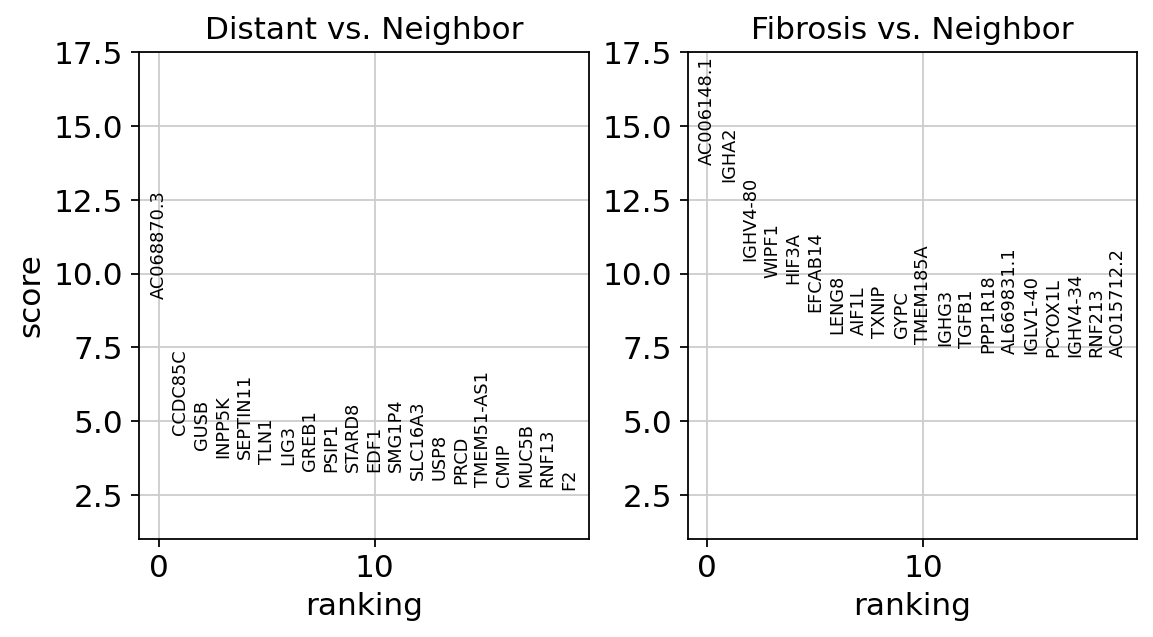

In [161]:
sc.pl.rank_genes_groups(adata)

In [162]:
# Distance>Neighbor
pd_dict= {
    'gene_name':[],
    'score':[],
    'logfoldchanges':[],
    'pvals':[],
    'pvals_adj':[]
}
# score_list = adata.uns['rank_genes_groups']['score']
# score_
for i in range(1000):
    cur_name = adata.uns['rank_genes_groups']['names'][i][0]
    cur_logfc = adata.uns['rank_genes_groups']['logfoldchanges'][i][0]
    cur_pvals = adata.uns['rank_genes_groups']['pvals'][i][0]    
    cur_pvals_adj = adata.uns['rank_genes_groups']['pvals_adj'][i][0]  
    cur_score = adata.uns['rank_genes_groups']['scores'][i][0]  
    
    pd_dict['gene_name'].append(cur_name)
    pd_dict['logfoldchanges'].append(cur_logfc)
    pd_dict['pvals'].append(cur_pvals)
    pd_dict['pvals_adj'].append(cur_pvals_adj)
    pd_dict['score'].append(cur_score)
    
    

In [163]:
pd_df = pd.DataFrame(pd_dict)

In [156]:
pd_df.to_csv('N2D_top1000.csv')

In [164]:
pd_df[pd_df.pvals_adj<=0.1].to_csv('D2N_0p1.csv')

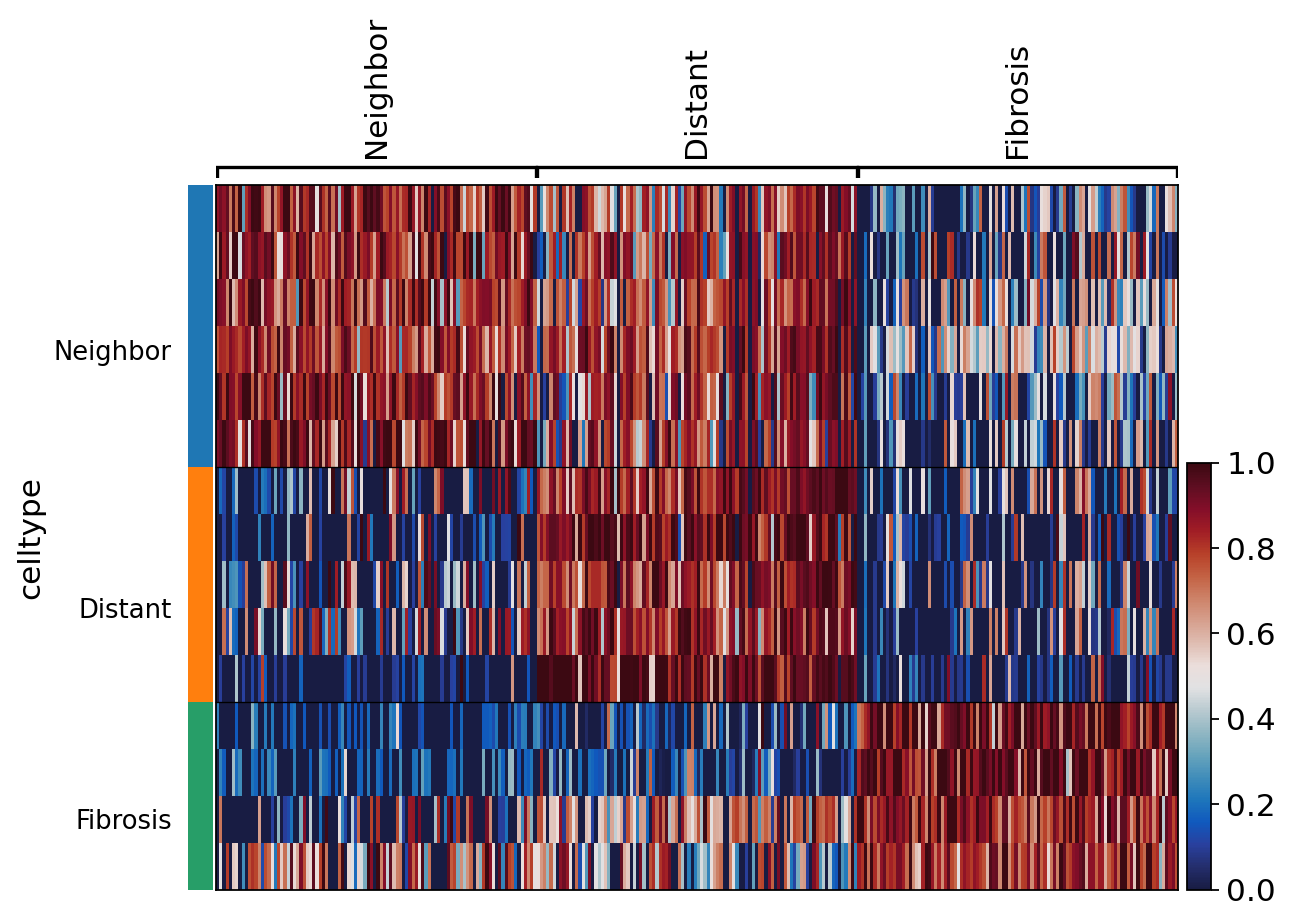

In [113]:
sc.pl.rank_genes_groups_heatmap(adata,n_genes=100,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

In [235]:
gene_uns = list(adata.uns['rank_genes_groups']['names'])

In [335]:
top_n = 10000
key_genes = []
for gu in gene_uns[:top_n]:
    cur_li = list(gu)
    key_genes.extend(cur_li)

In [336]:
len(key_genes)

300

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:413: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(means[imask]) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/home/yzy/anaconda3/envs/pytorch/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


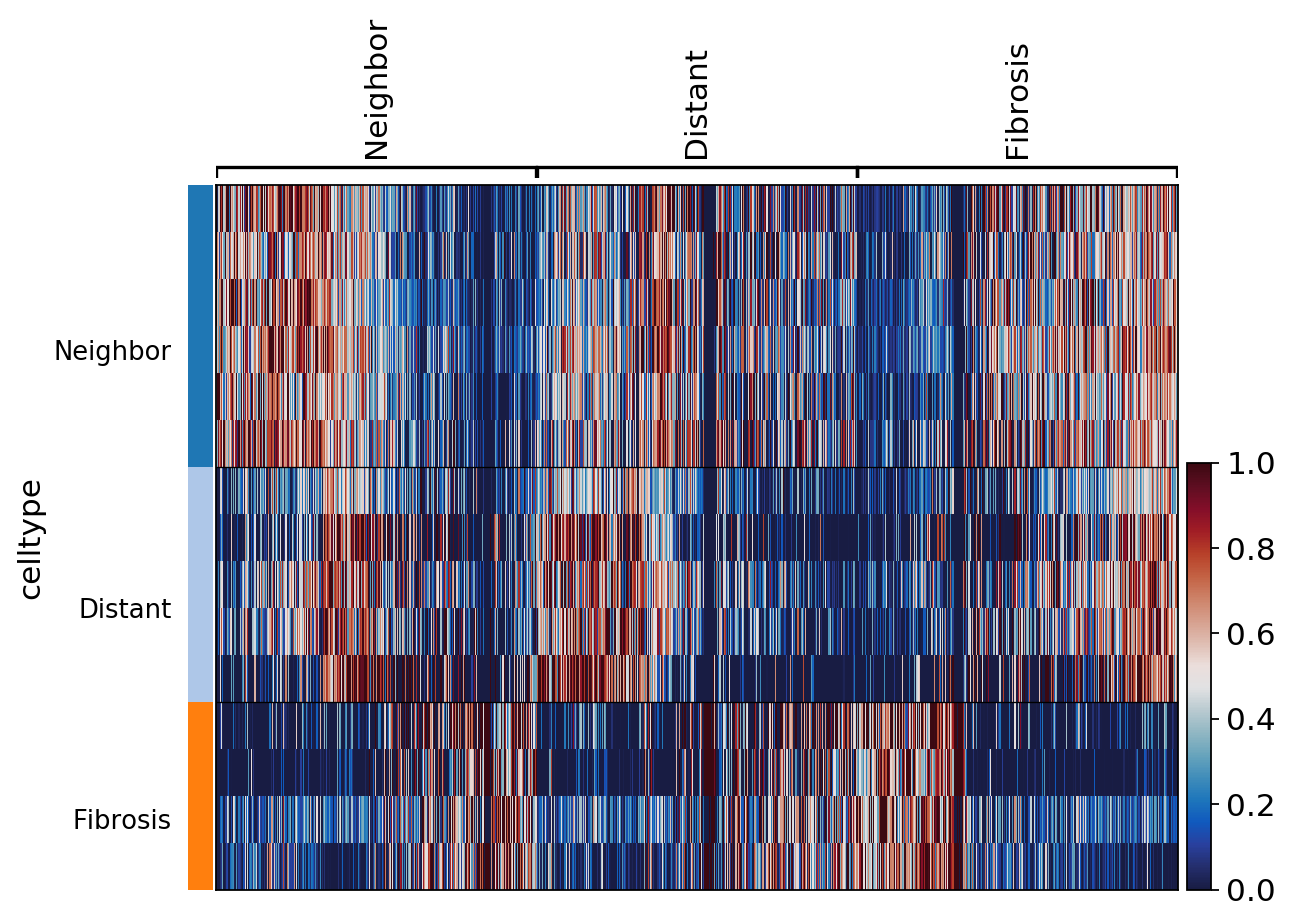

In [334]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='wilcoxon',n_genes=10000)
sc.pl.rank_genes_groups_heatmap(adata,n_genes=1000,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


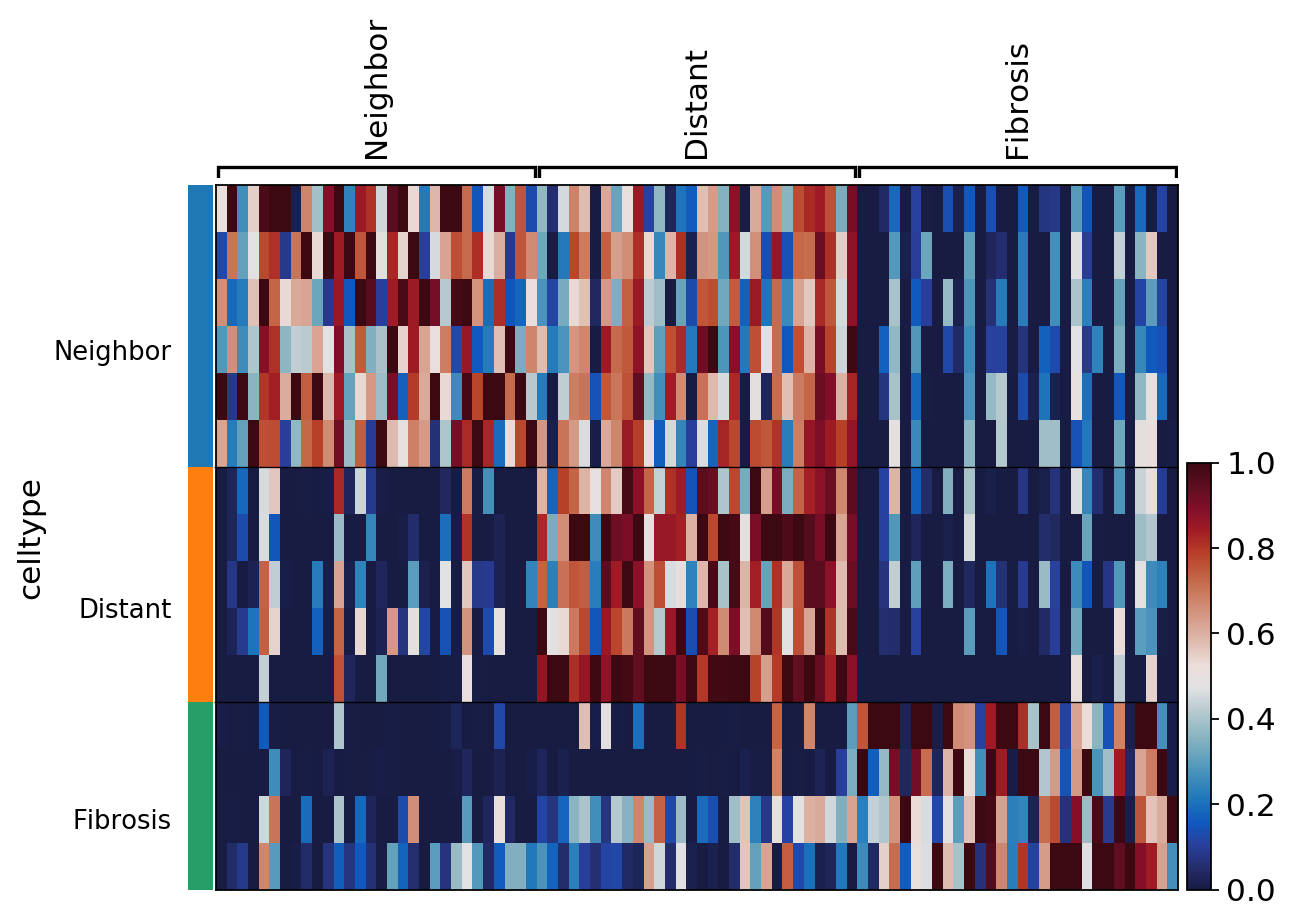

In [83]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='wilcoxon')
sc.pl.rank_genes_groups_heatmap(adata,n_genes=30,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:02)


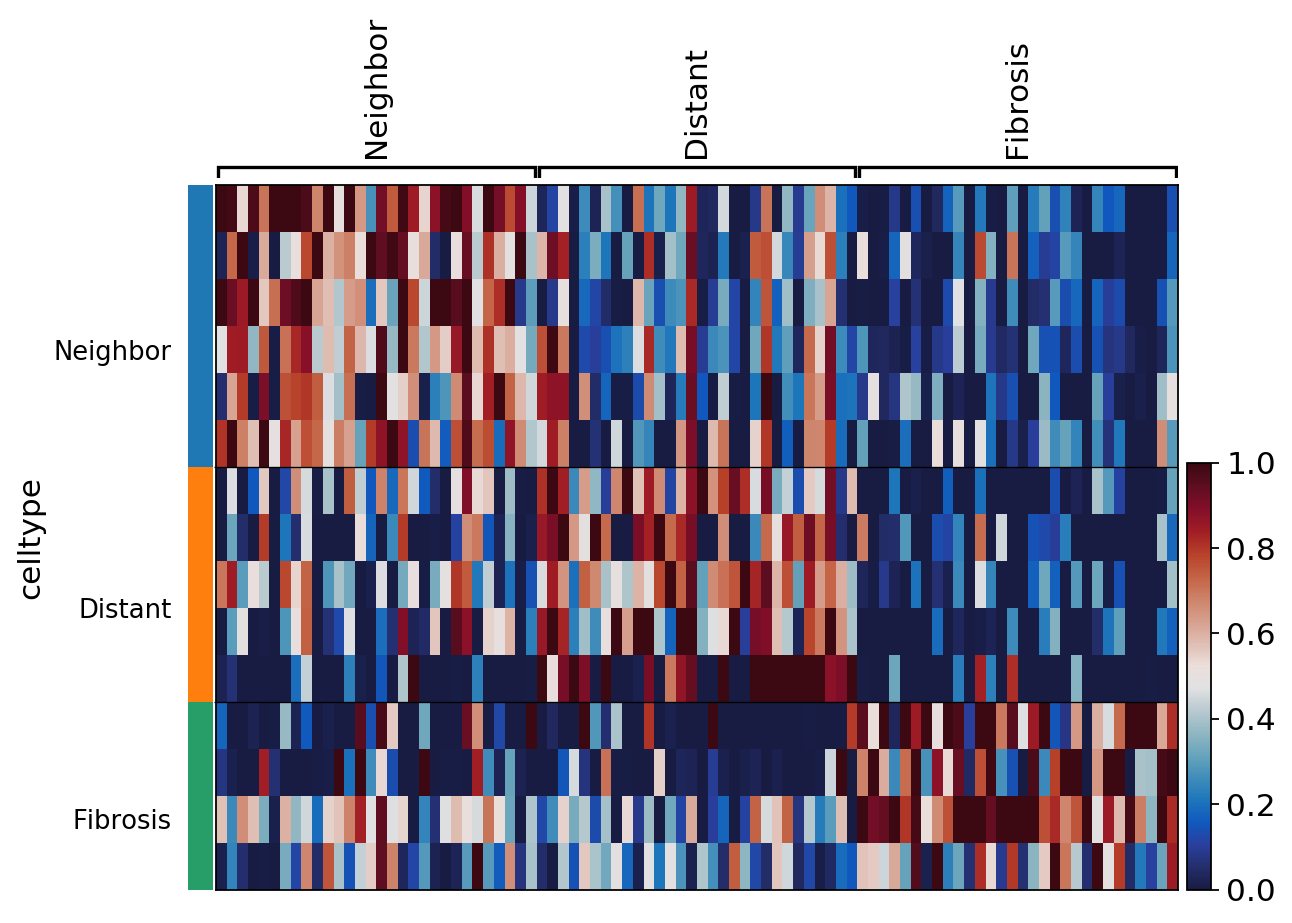

In [84]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='logreg')
sc.pl.rank_genes_groups_heatmap(adata,n_genes=30,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


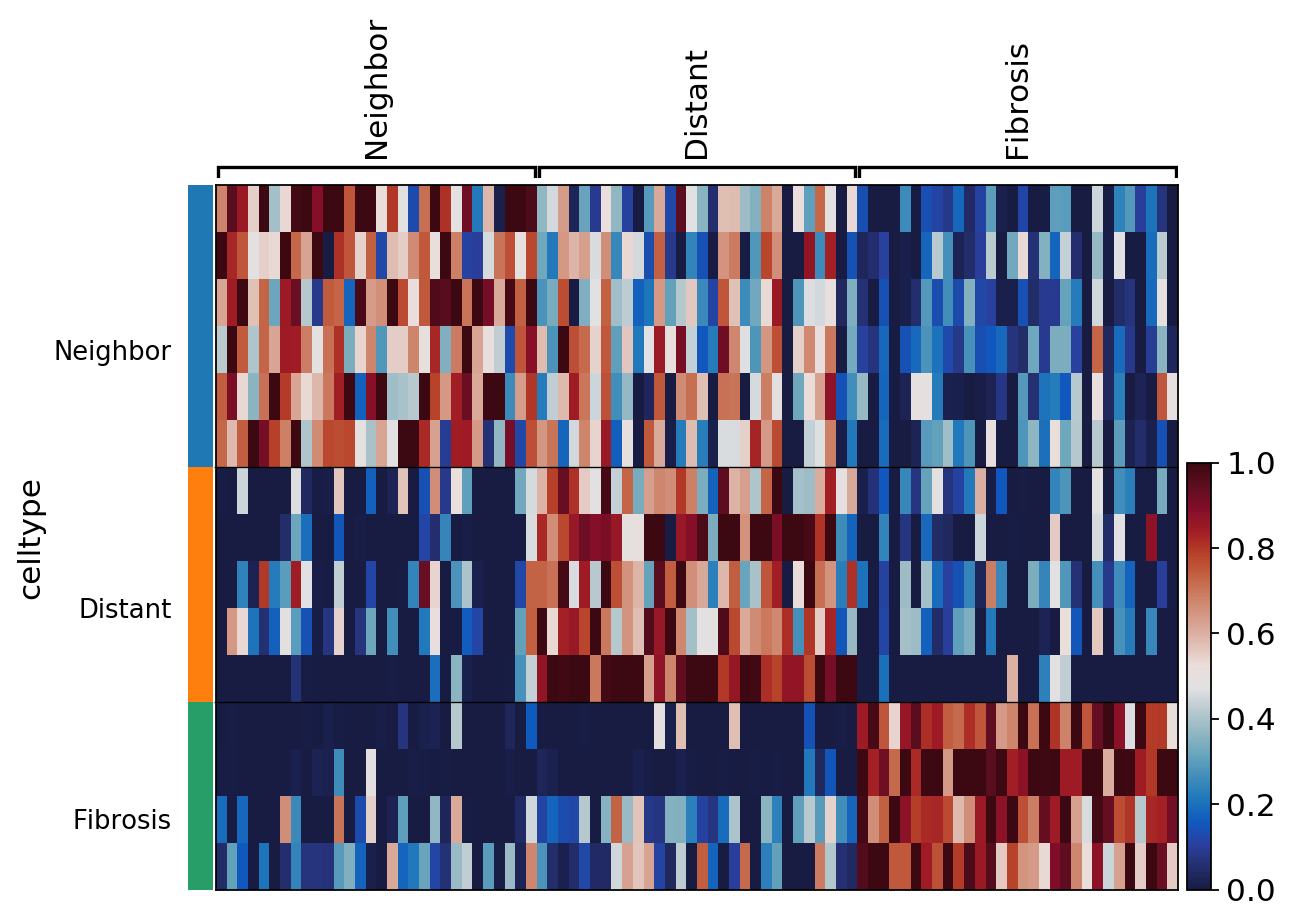

In [86]:
sc.tl.rank_genes_groups(adata,groupby='celltype',method='t-test_overestim_var')
sc.pl.rank_genes_groups_heatmap(adata,n_genes=30,cmap=heatmap_cmp,standard_scale='var',dendrogram=False)

# GO 

## pre

In [66]:
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

  EXISTS: go-basic.obo


In [37]:
from goatools.base import download_ncbi_associations
fin_gene2go = download_ncbi_associations()

  EXISTS: gene2go


In [38]:
from goatools.obo_parser import GODag

obodag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2020-03-23) 47,232 GO Terms


In [51]:
from goatools.anno.genetogo_reader import Gene2GoReader

# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno = Gene2GoReader(fin_gene2go, taxids=[9606])

# Get namespace2association where:
#    namespace is:
#        BP: biological_process               
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene
ns2assoc = objanno.get_ns2assc()

for nspc, id2gos in ns2assoc.items():
    print("{NS} {N:,} annotated mouse genes".format(NS=nspc, N=len(id2gos)))

HMS:0:00:03.928870 330,518 annotations, 20,562 genes, 18,403 GOs, 1 taxids READ: gene2go 
CC 19,334 annotated mouse genes
MF 17,537 annotated mouse genes
BP 18,499 annotated mouse genes


In [52]:
from goatools.test_data.genes_NCBI_9606_ProteinCoding import GENEID2NT as GeneID2nt_hum

In [53]:
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

goeaobj = GOEnrichmentStudyNS(
        GeneID2nt_hum.keys(), # List of mouse protein-coding genes
        ns2assoc, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method


Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 80% 16,783 of 20,913 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 85% 17,790 of 20,913 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 80% 16,754 of 20,913 population items found in association


## gene input

In [83]:
# Data will be stored in this variable
import os
geneid2symbol = {}
ROOT = '/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/'
# Get xlsx filename where data is stored
# ROOT = os.path.dirname(os.getcwd()) # go up 1 level from current working directory
din_xlsx = os.path.join(ROOT, "goatools/test_data/nbt_3102/nbt.3102-S4_GeneIDs.xlsx")
# Read data
if os.path.isfile(din_xlsx):  
    import xlrd
    book = xlrd.open_workbook(din_xlsx)
    pg = book.sheet_by_index(0)
    for r in range(pg.nrows):
        symbol, geneid, pval = [pg.cell_value(r, c) for c in range(pg.ncols)]
        if geneid:
            geneid2symbol[int(geneid)] = symbol
    print('{N} genes READ: {XLSX}'.format(N=len(geneid2symbol), XLSX=din_xlsx))
else:
    raise RuntimeError('FILE NOT FOUND: {XLSX}'.format(XLSX=din_xlsx))

400 genes READ: /home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/goatools/test_data/nbt_3102/nbt.3102-S4_GeneIDs.xlsx


In [56]:
geneids_study = geneid2symbol.keys()
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]


Run BP Gene Ontology Analysis: current study set of 2032 IDs ...100%  2,032 of  2,032 study items found in association
100%  2,032 of  2,032 study items found in population(20913)
Calculating 12,284 uncorrected p-values using fisher_scipy_stats
  12,284 GO terms are associated with 16,783 of 20,913 population items
   6,682 GO terms are associated with  2,032 of  2,032 study items
  METHOD fdr_bh:
   1,382 GO terms found significant (< 0.05=alpha) (1367 enriched +  15 purified): statsmodels fdr_bh
   2,028 study items associated with significant GO IDs (enriched)
     113 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 2032 IDs ... 99%  2,015 of  2,032 study items found in association
100%  2,032 of  2,032 study items found in population(20913)
Calculating 1,753 uncorrected p-values using fisher_scipy_stats
   1,753 GO terms are associated with 17,790 of 20,913 population items
     991 GO terms are associated with  2,015 

In [60]:
goea_quiet_all = goeaobj.run_study(geneids_study, prt=None)
goea_quiet_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]

In [61]:
print('{N} of {M:,} results were significant'.format(
    N=len(goea_quiet_sig),
    M=len(goea_quiet_all)))

1909 of 18,246 results were significant


In [62]:
print('Significant results: {E} enriched, {P} purified'.format(
    E=sum(1 for r in goea_quiet_sig if r.enrichment=='e'),
    P=sum(1 for r in goea_quiet_sig if r.enrichment=='p')))

Significant results: 1877 enriched, 32 purified


In [63]:
import collections as cx
ctr = cx.Counter([r.NS for r in goea_quiet_sig])
print('Significant results[{TOTAL}] = {BP} BP + {MF} MF + {CC} CC'.format(
    TOTAL=len(goea_quiet_sig),
    BP=ctr['BP'],  # biological_process
    MF=ctr['MF'],  # molecular_function
    CC=ctr['CC'])) # cellular_component

Significant results[1909] = 1382 BP + 248 MF + 279 CC


In [64]:
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj

plot_results("nbt3102_{NS}.png", goea_results_sig)

  1382 usr 3104 GOs  WROTE: nbt3102_BP.png
  279 usr 391 GOs  WROTE: nbt3102_CC.png
  248 usr 413 GOs  WROTE: nbt3102_MF.png


In [65]:
# Plot subset starting from these significant GO terms
goid_subset = [
    'GO:0003723', # MF D04 RNA binding (32 genes)
    'GO:0044822', # MF D05 poly(A) RNA binding (86 genes)
    'GO:0003729', # MF D06 mRNA binding (11 genes)
    'GO:0019843', # MF D05 rRNA binding (6 genes)
    'GO:0003746', # MF D06 translation elongation factor activity (5 genes)
]
plot_gos("nbt3102_MF_RNA_genecnt.png", 
    goid_subset, # Source GO ids
    obodag, 
    goea_results=goea_results_all) # Use pvals for coloring

    5 usr  13 GOs  WROTE: nbt3102_MF_RNA_genecnt.png


In [85]:
for k in geneid2symbol.keys():
    print(geneid2symbol[k])

ENSMUSG00000083773
Pkm
Eno1
Fxyd5
Rplp1
Cfl1
Rplp0
Pgk1
Rpl13a
Rps9
Rpl32
Gm5506
Rpl41
ENSMUSG00000062456
Aldoa
ENSMUSG00000063696
ENSMUSG00000084349
Ldha
ENSMUSG00000064193
ENSMUSG00000081434
ENSMUSG00000097906
Eef2
Bsg
Rpl13
Cytip
Rps5
Actg1
Selplg
H2-D1
Npc2
ENSMUSG00000046721
Gnb2l1
Gata3
Lcp1
Rpl14
Rpl4
Rpl18
Rps2
Vim
ENSMUSG00000073403
Slc25a4
ENSMUSG00000081051
Ccnd2
Rps26
Eef1a1
Eif5a
Cdc42
Laptm5
Rps11
ENSMUSG00000059195
H2-K1
ENSMUSG00000086583
Bnip3l
Fam162a
Wdr1
Cd3d
Calm1
Actb
Anxa6
Rps3
Rnh1
Rpl18a
Il4ra
Rac2
Arpc2
Rpl6
Shisa5
Gpi1
Rps20
Mif
Rpl24
Pfn1
Cdkn1a
Ccnd3
Il2ra
ENSMUSG00000058126
Rps14
Tpi1
Tnfrsf18
Btf3
Prr13
Hsp90ab1
Ndufv3
Casp6
Rps24
ENSMUSG00000062353
Rps19
Klf13
Rps10
Cd3g
Tmbim6
Rpl7a
Rps7
Cd2
Rpl7
Ptp4a2
Rps4x
Cox6a1
Cox4i1
ENSMUSG00000044285
Coro1a
B2m
Pfkp
Rpl34
Eif3i
Fth1
Fermt3
Ubb
Tnfrsf9
Cdk6
Prelid1
Cope
Rpsa
Batf
ENSMUSG00000091449
Ubl3
Arhgdib
Gsk3b
Sdf4
Zbtb38
Psme2
P4hb
Eif3h
Zc3hav1
Hilpda
Rps3a1
Aco2
Atp5f1
Ywhae
Glo1
Rpl23
Rps15
Crem
Rps15a